## Problem Defination

* Problem
    * Developing a Model That Predicts Heart Disease Targets Using Machine Learning

* Dataset
    * This heart disease dataset is curated by combining 5 popular heart disease datasets already available independently but not combined before. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:
        * Cleveland
        * Hungarian
        * Switzerland
        * Long Beach VA
        * Statlog (Heart) Data Set.

    * This dataset consists of 1190 instances with 11 features. These datasets were collected and combined at one place to help advance research on CAD-related machine learning and data mining algorithms, and hopefully to ultimately advance clinical diagnosis and early treatment.
    * https://www.kaggle.com/datasets/mexwell/heart-disease-dataset

## Import Required Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## Gathering and Observing Data

* Find shape, size and column count
* Show some information like number of col, col label, col data type, memory usage, number of cell in each col

In [2]:
df = pd.read_csv("data/heart_statlog_cleveland_hungary_final.csv")
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [3]:
df.dtypes


age                      int64
sex                      int64
chest pain type          int64
resting bp s             int64
cholesterol              int64
fasting blood sugar      int64
resting ecg              int64
max heart rate           int64
exercise angina          int64
oldpeak                float64
ST slope                 int64
target                   int64
dtype: object

In [4]:
df.memory_usage()

Index                   128
age                    9520
sex                    9520
chest pain type        9520
resting bp s           9520
cholesterol            9520
fasting blood sugar    9520
resting ecg            9520
max heart rate         9520
exercise angina        9520
oldpeak                9520
ST slope               9520
target                 9520
dtype: int64

In [5]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
df.shape[0] # Number of cell in each column

1190

In [7]:
df.memory_usage()

Index                   128
age                    9520
sex                    9520
chest pain type        9520
resting bp s           9520
cholesterol            9520
fasting blood sugar    9520
resting ecg            9520
max heart rate         9520
exercise angina        9520
oldpeak                9520
ST slope               9520
target                 9520
dtype: int64

## Explonaroty Data Analysis 

* Examine the descriptive statistics of dataset
* Check for duplicate data and clear.
* Clear outlier data in the dataset.
* Find and remove the missing values on the dataset
* Data visualization

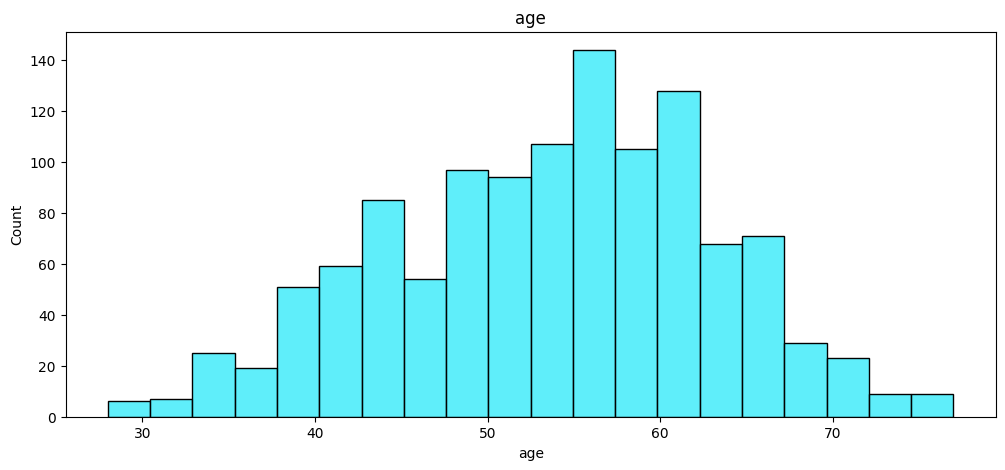

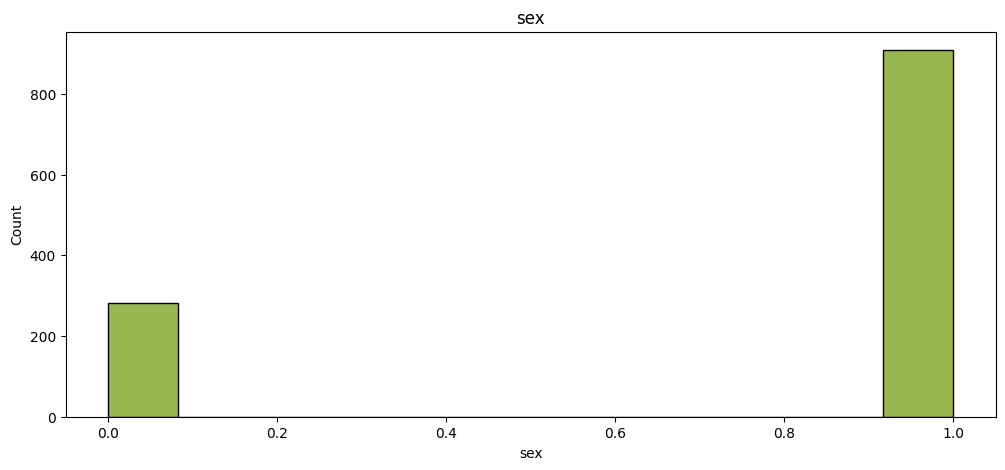

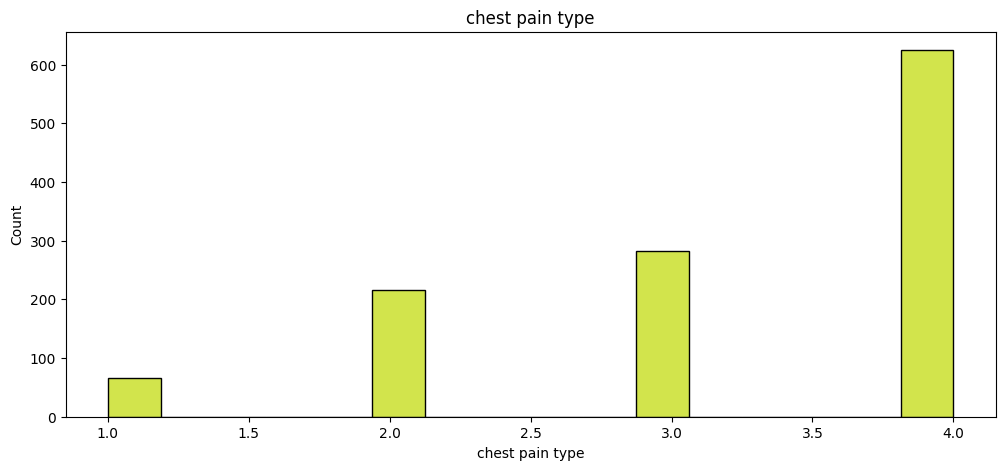

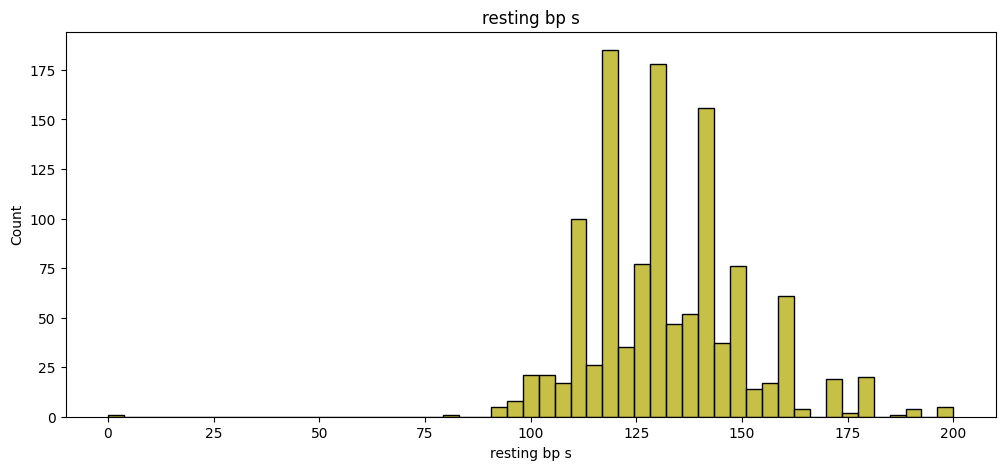

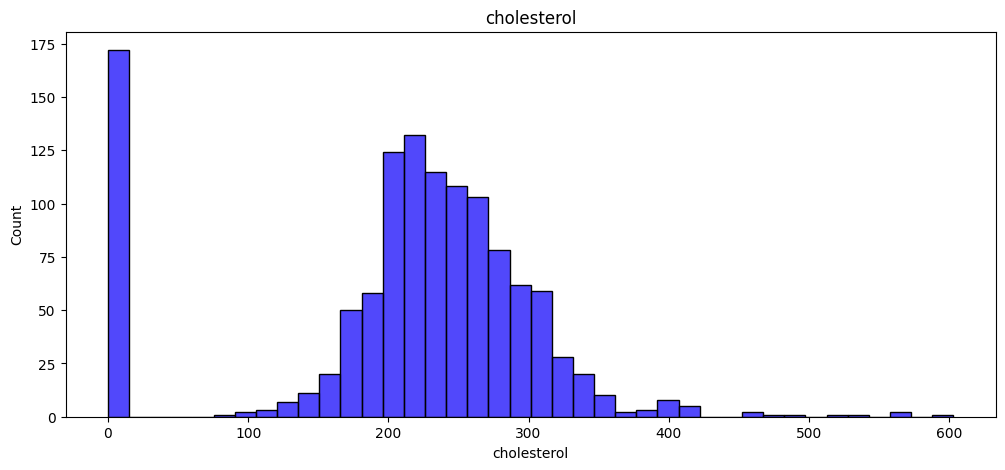

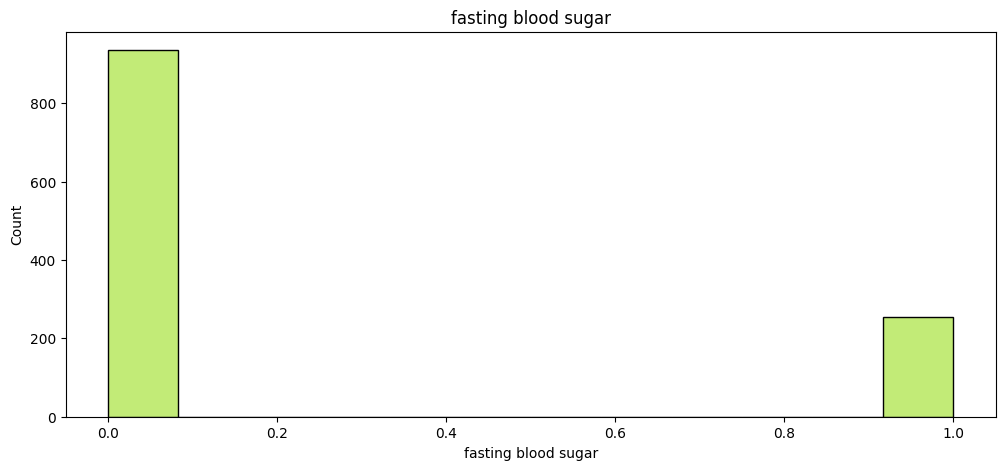

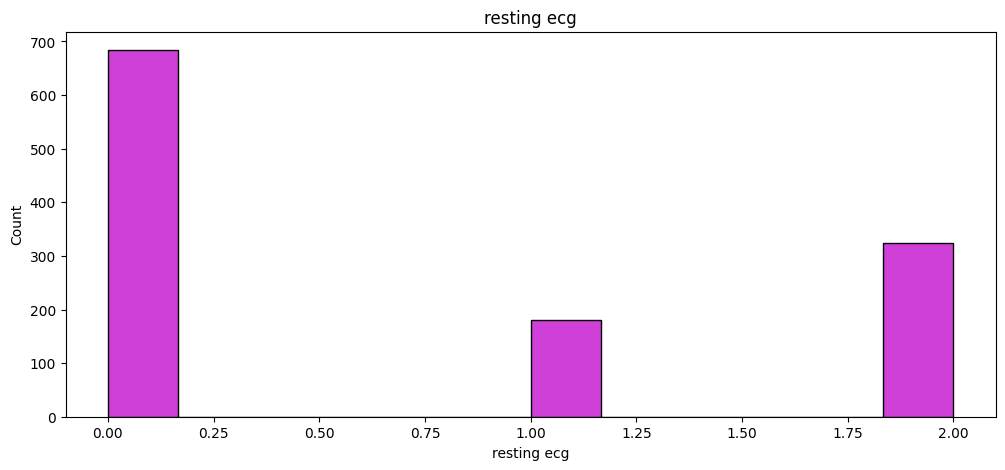

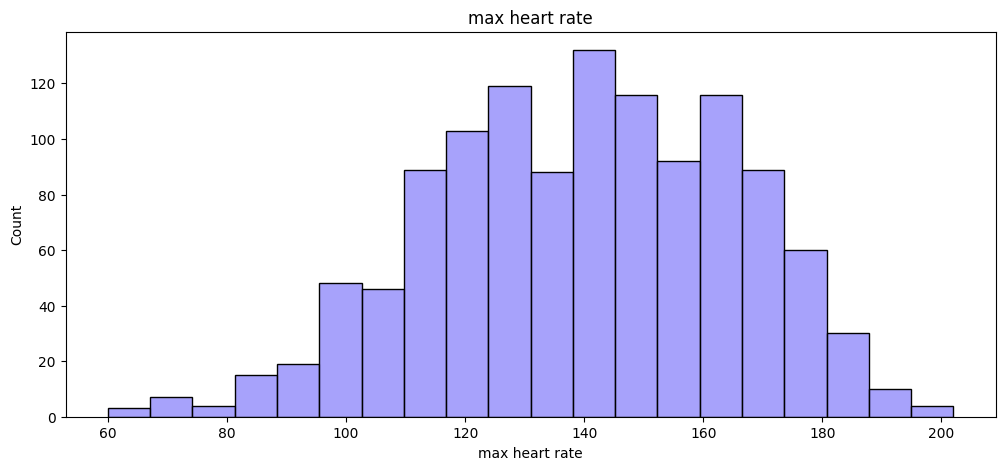

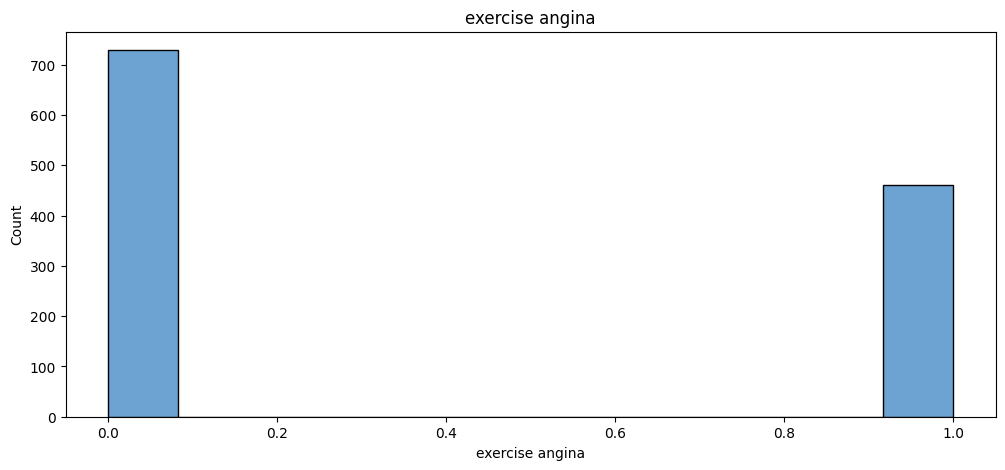

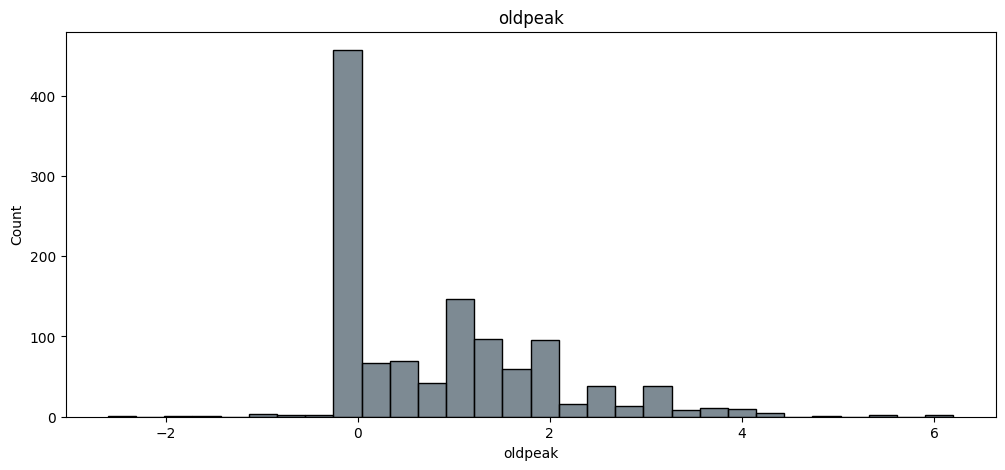

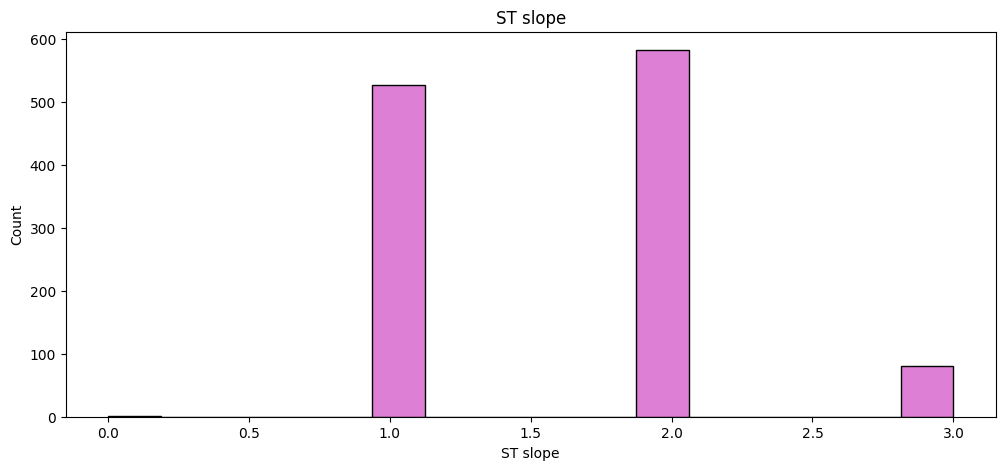

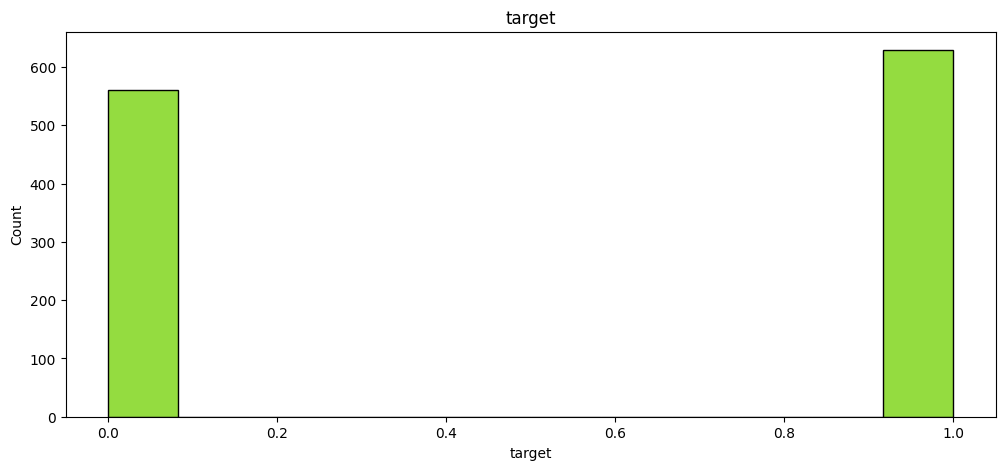

In [8]:
def createHistPlots():   
    for column in df.columns:
            plt.figure(figsize=(12, 5))
            sns.histplot(df[column],color=np.random.rand(3,))
            plt.title(column)
createHistPlots() # Examine data distribution


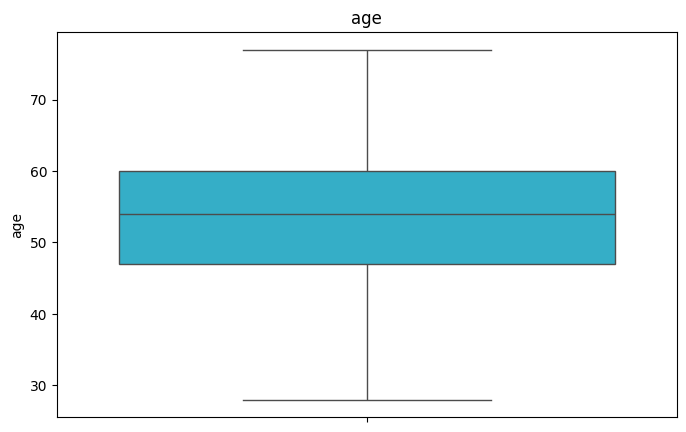

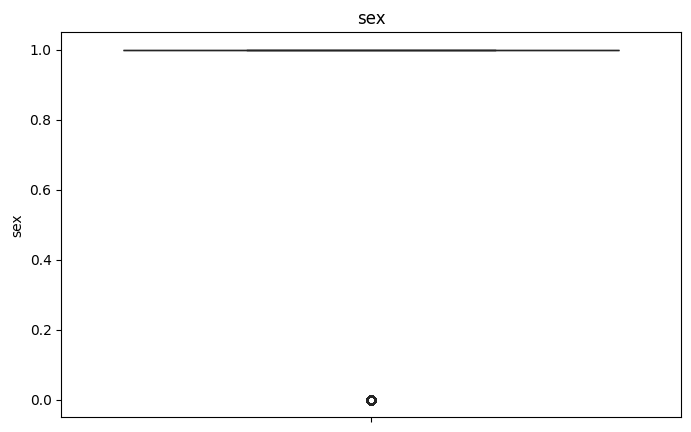

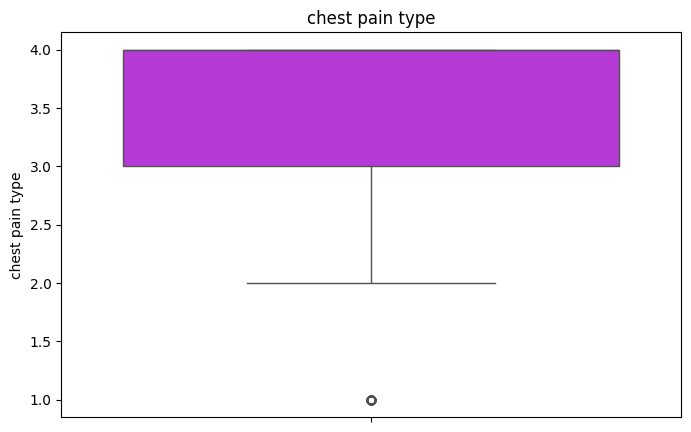

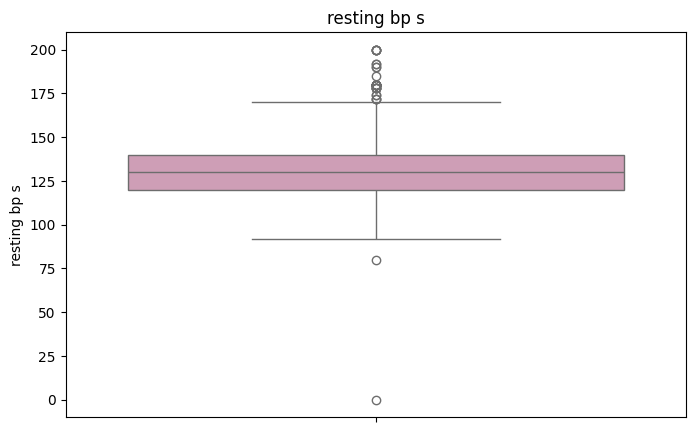

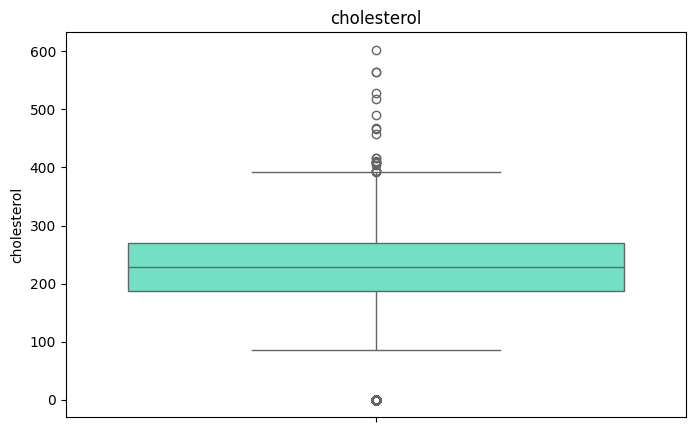

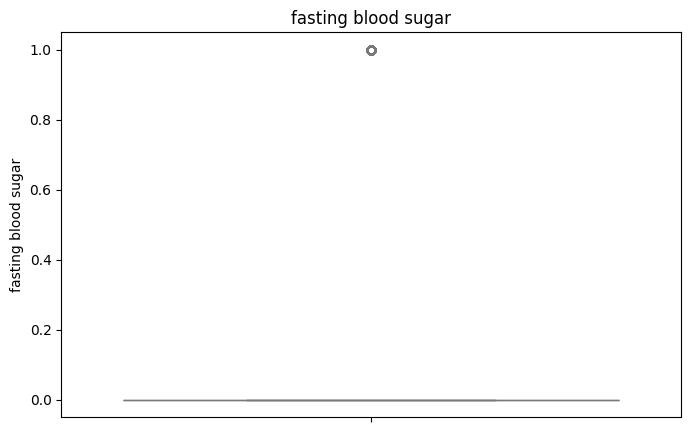

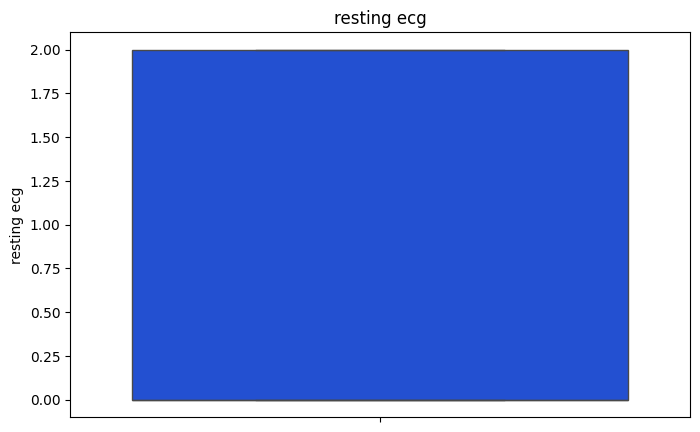

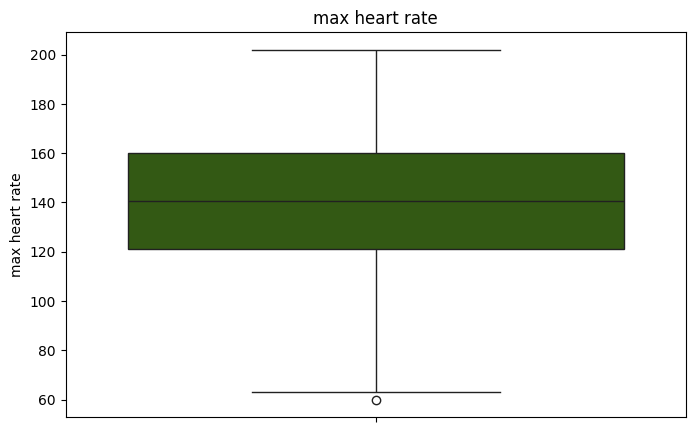

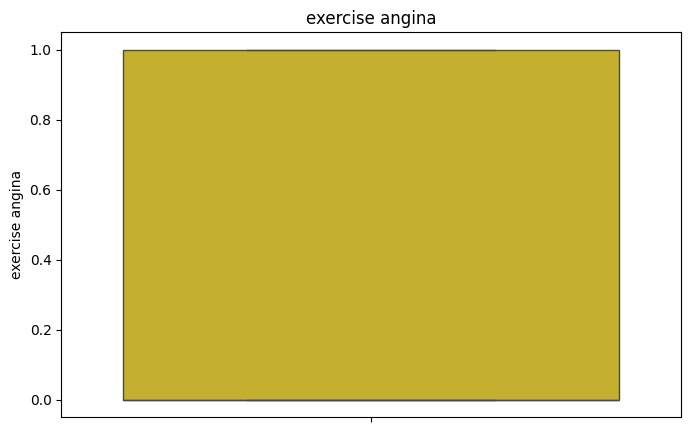

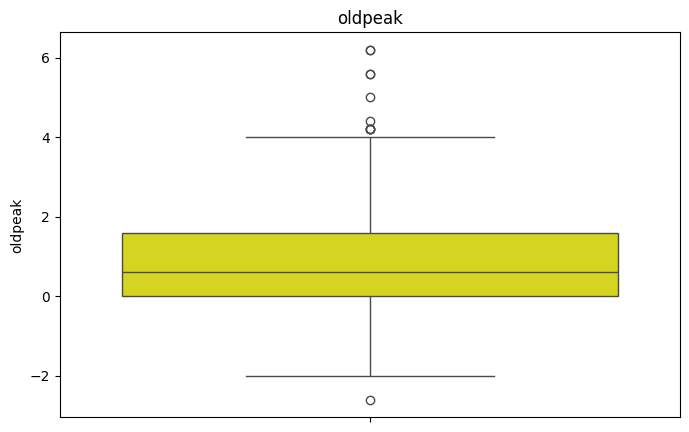

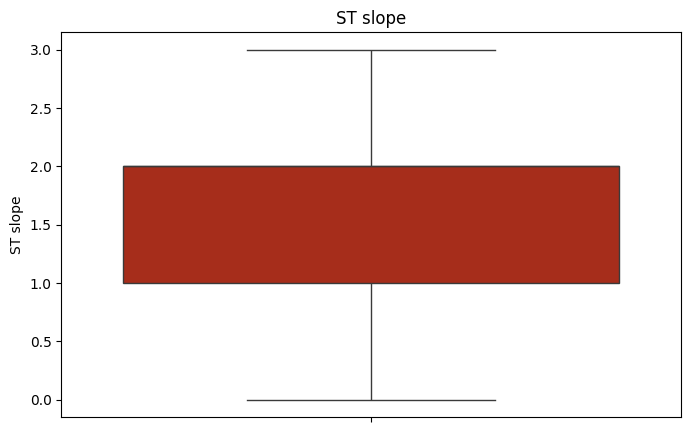

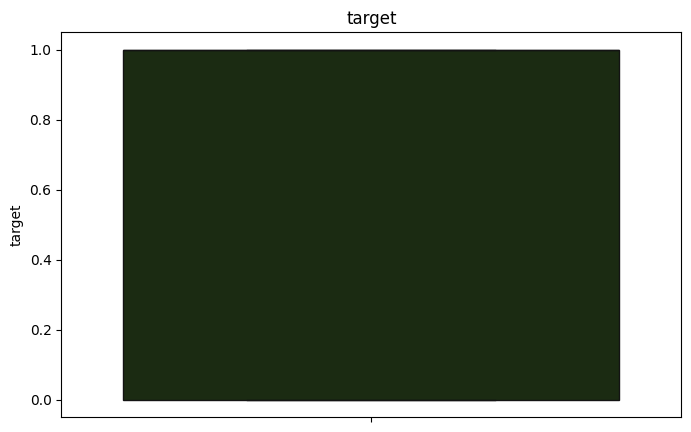

In [9]:
def createBoxPlots():
    for column in df.columns:
        plt.figure(figsize=(8, 5))
        sns.boxplot(df[column],color=np.random.rand(3,))
        plt.title(column)
createBoxPlots() # Outlier data amount analysis

In [10]:
for column in df.columns:
    df = df[np.abs(stats.zscore(df[column],nan_policy="omit"))<2] # Outlier data extraction
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1182,41,1,2,120,157,0,0,182,0,0.0,1,0
1184,57,0,4,140,241,0,0,123,1,0.2,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


C:\Users\Gökdeniz\AppData\Local\Temp\ipykernel_16756\235715008.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8, 5))


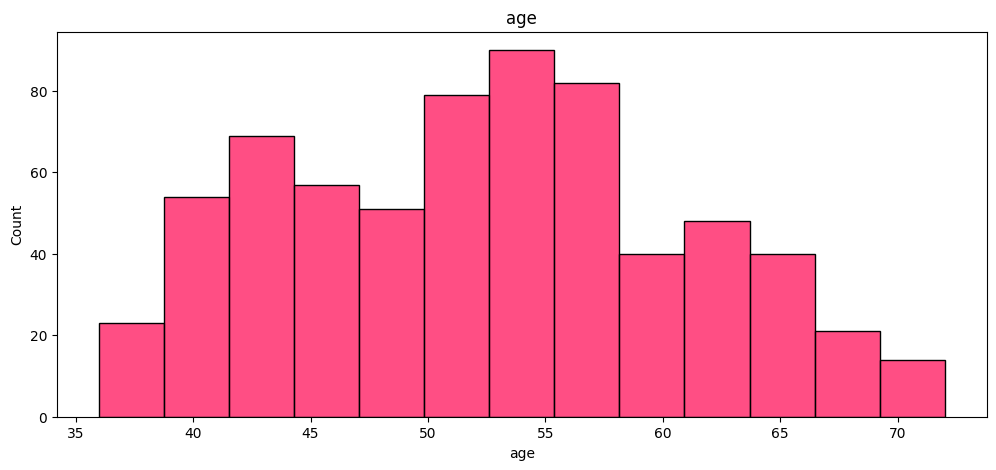

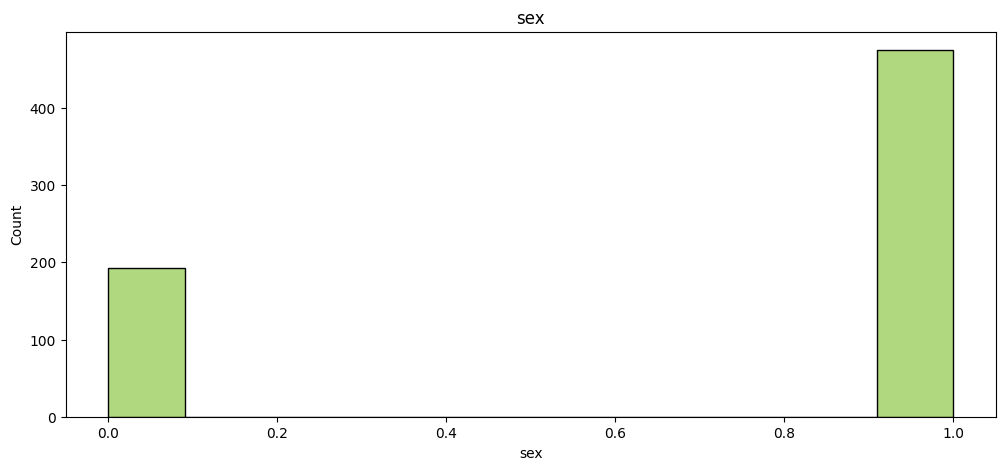

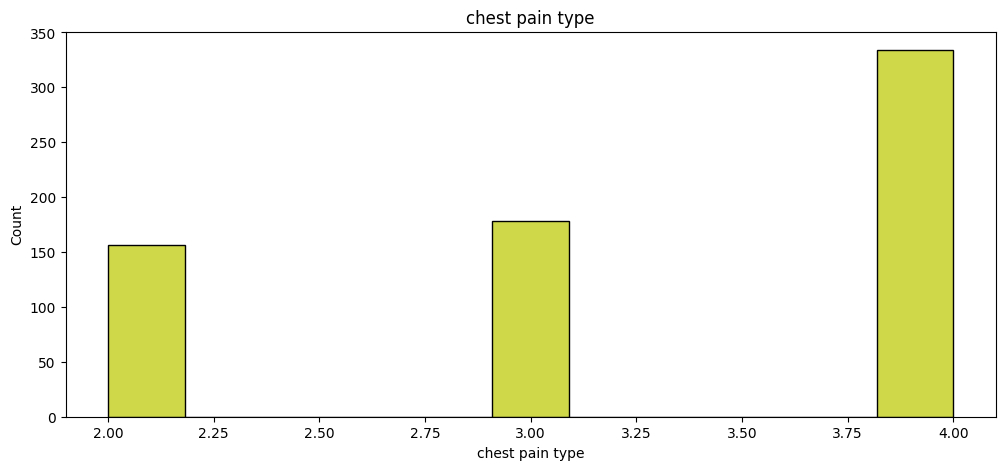

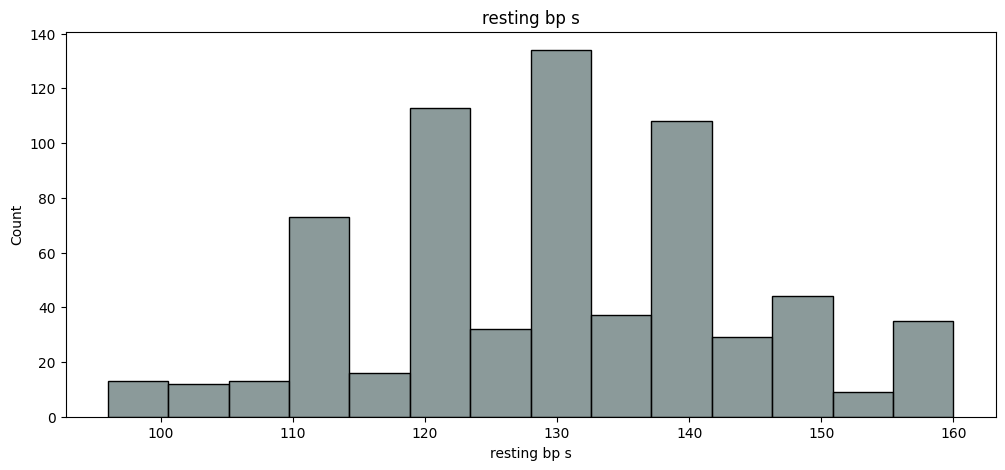

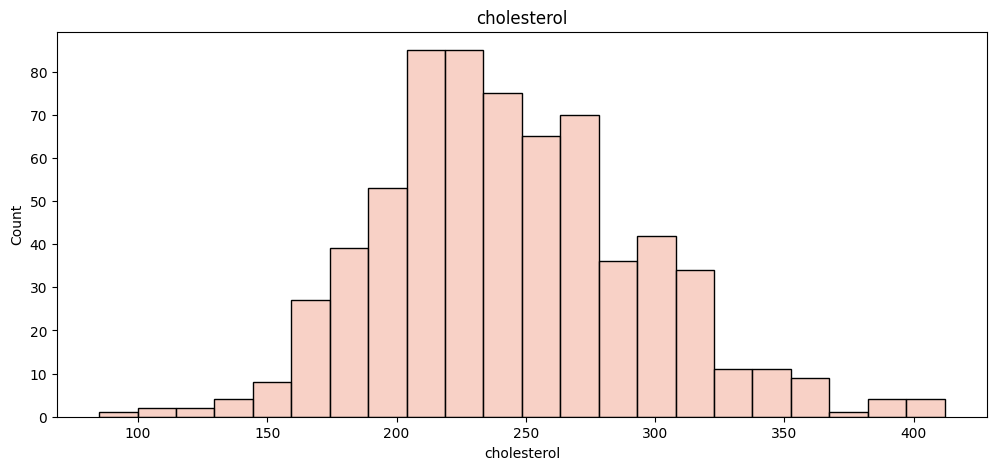

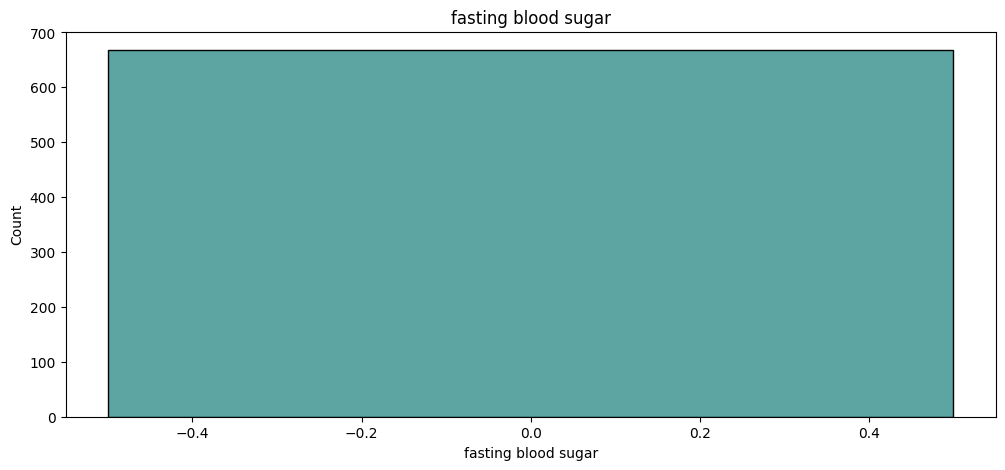

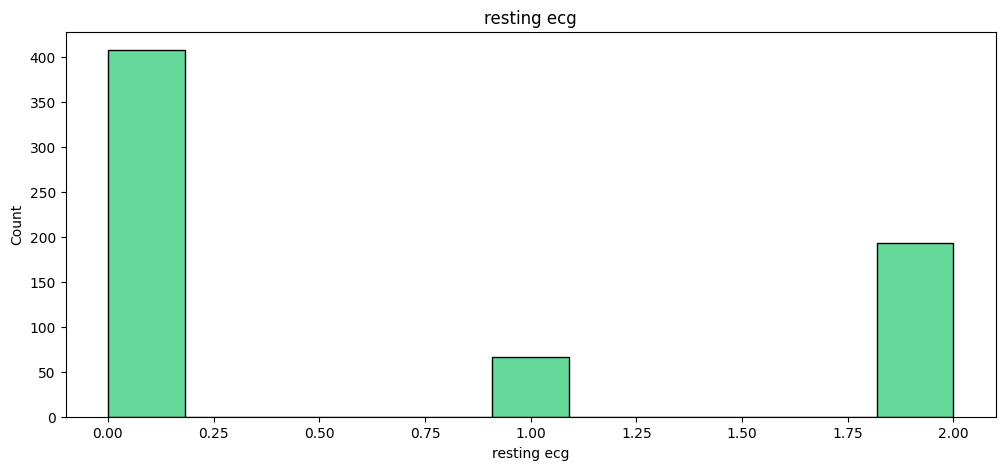

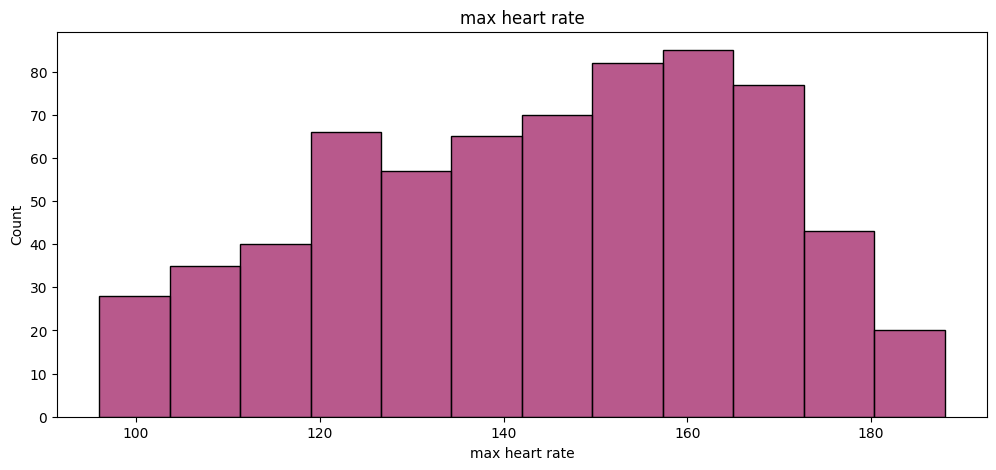

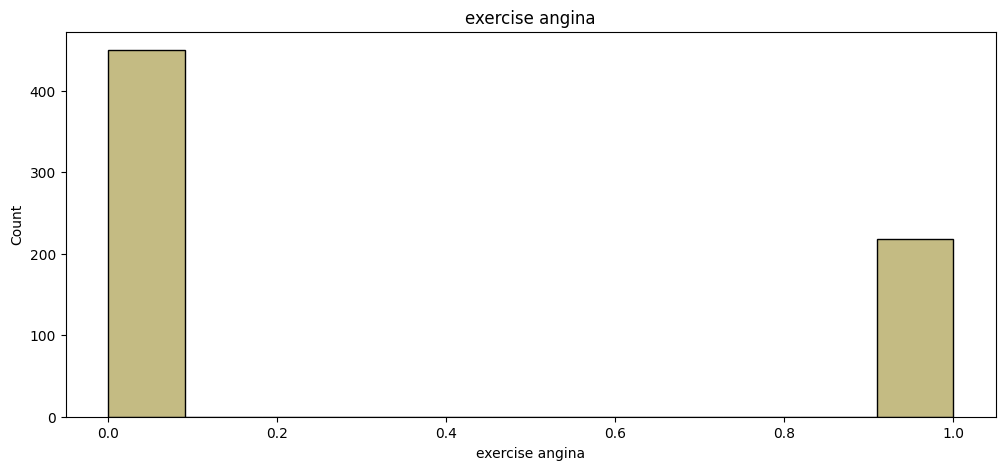

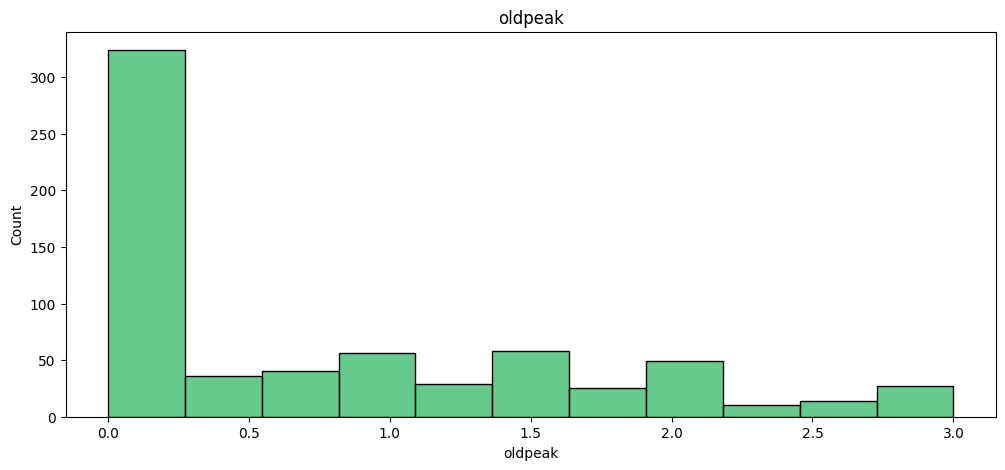

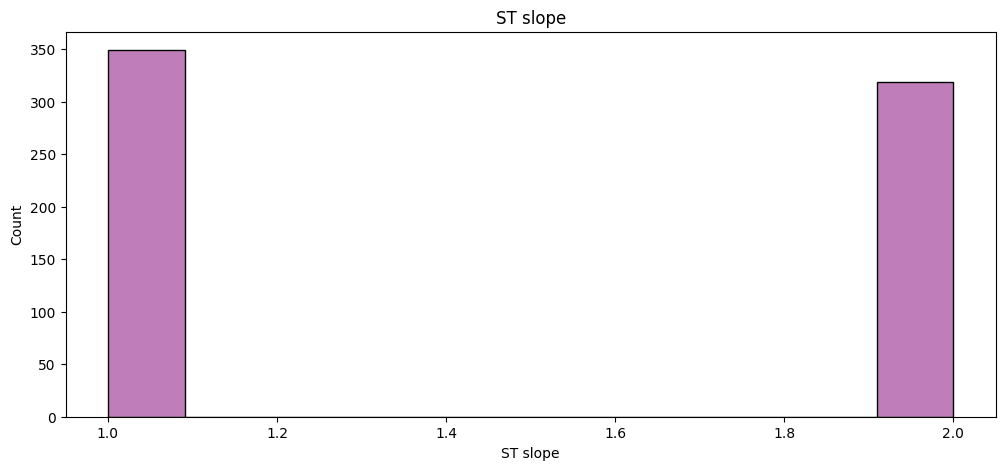

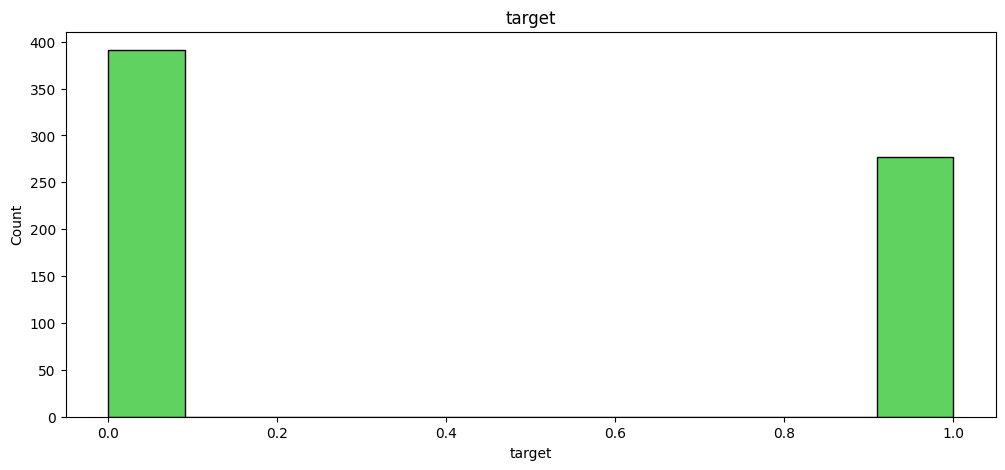

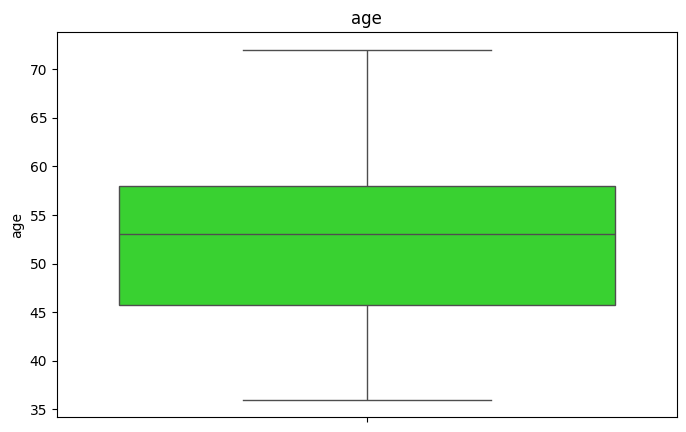

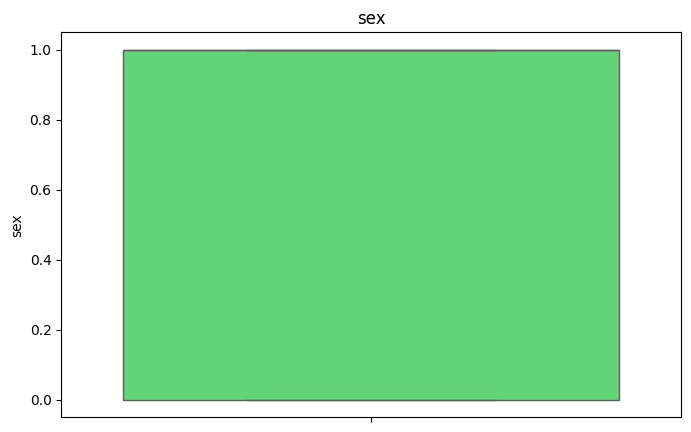

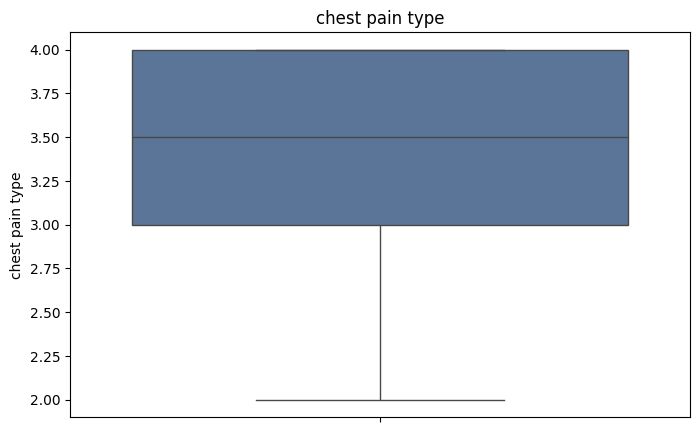

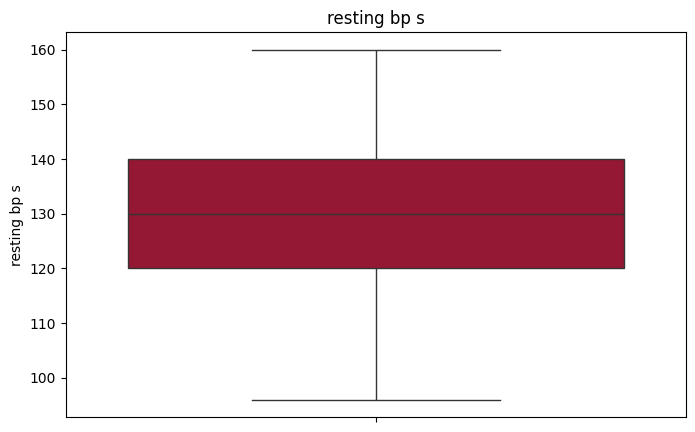

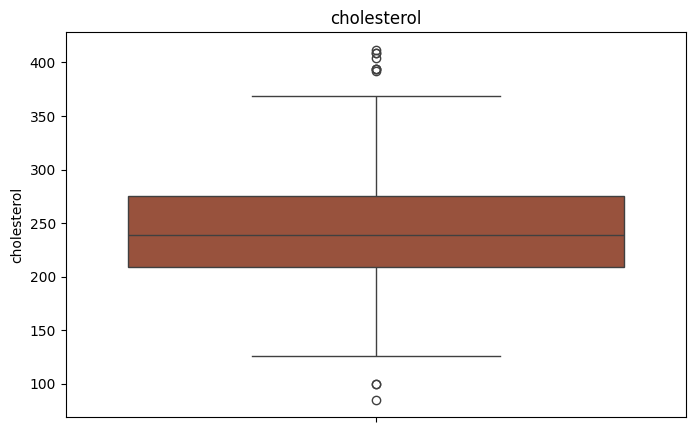

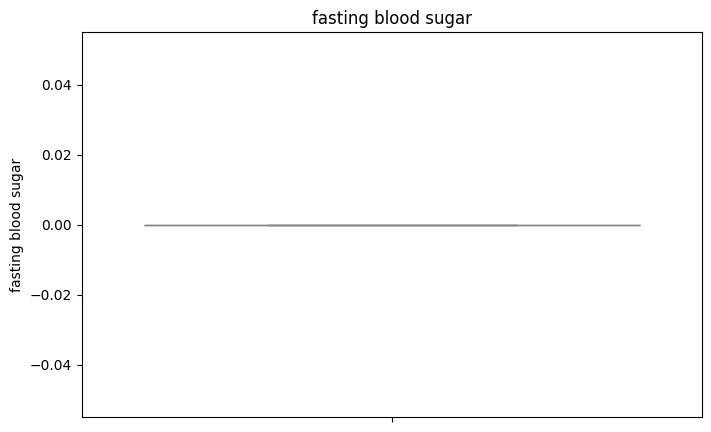

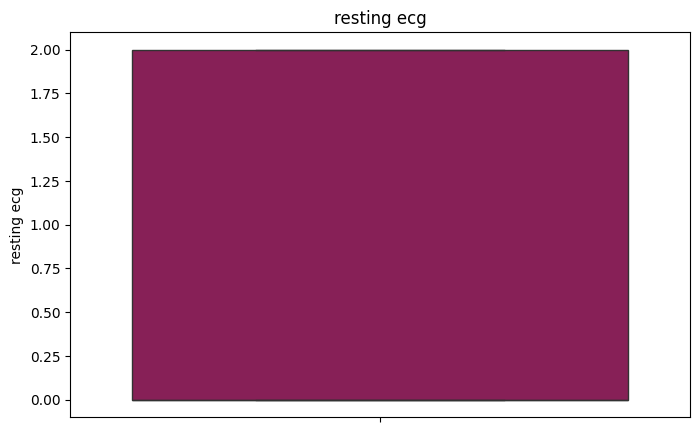

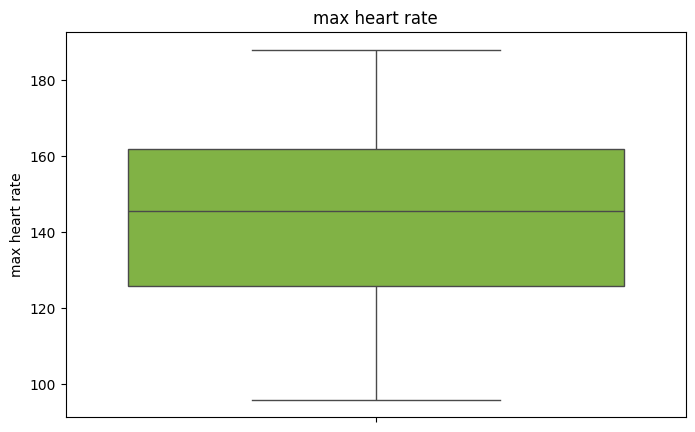

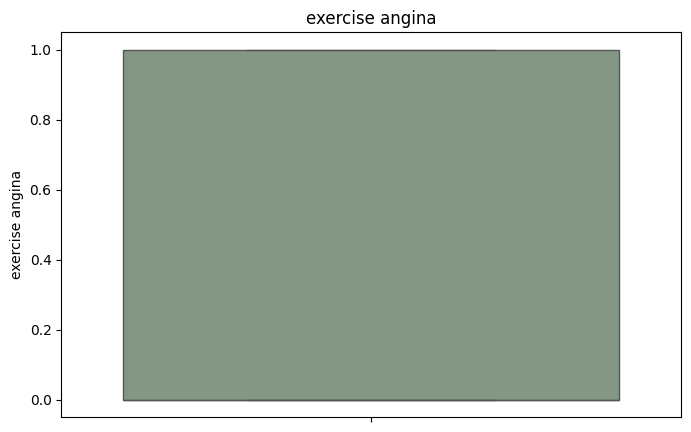

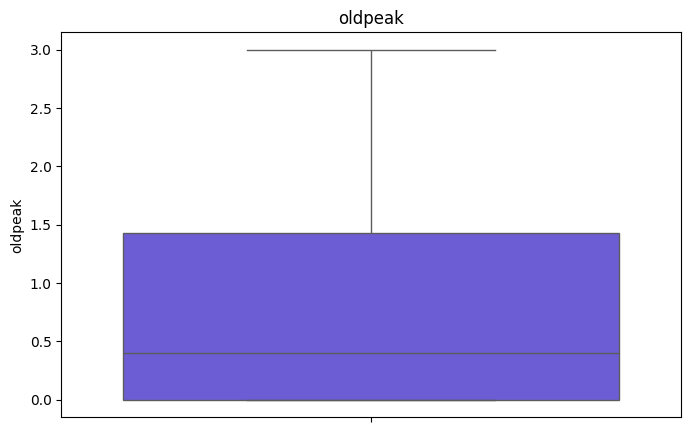

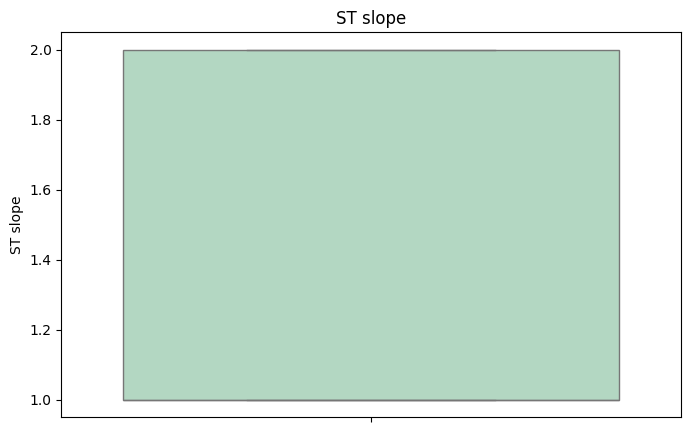

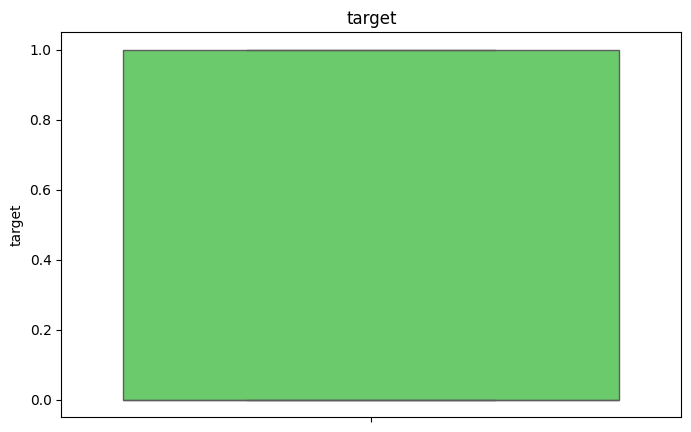

In [11]:
# Check new version of data
createHistPlots()
createBoxPlots() 

In [12]:
for column in df.columns:
    df[column] = df[column].fillna(df[column].mode().iloc[0]) # Filling empty data
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1182,41,1,2,120,157,0,0,182,0,0.0,1,0
1184,57,0,4,140,241,0,0,123,1,0.2,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


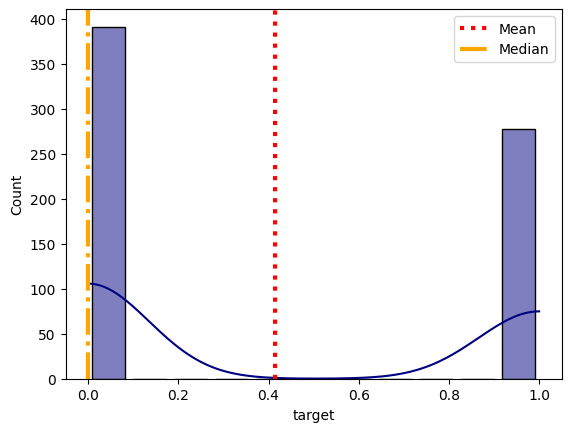

In [13]:
# Finding mean and median values ​​depending on target value
sns.histplot(df["target"],kde=True,shrink=.8,color = "navy")
plt.axvline(df["target"].mean(), 0 ,1,color="red",linewidth = 3,linestyle=":",label="Mean")
plt.axvline(df["target"].median(), 0 ,1,color="orange",linewidth = 3,linestyle="-.",label="Median")
plt.legend()

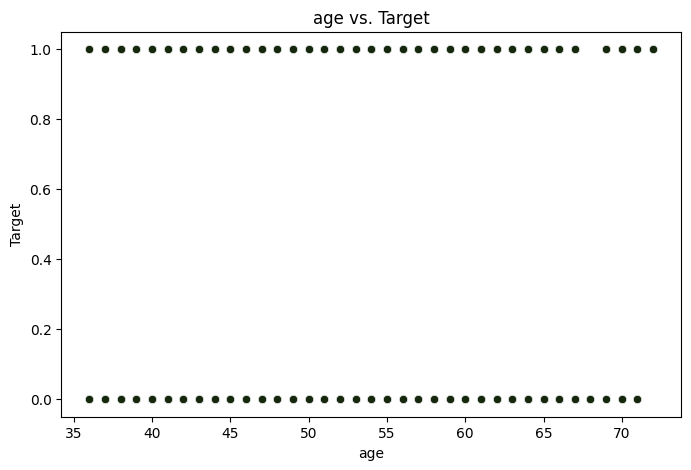

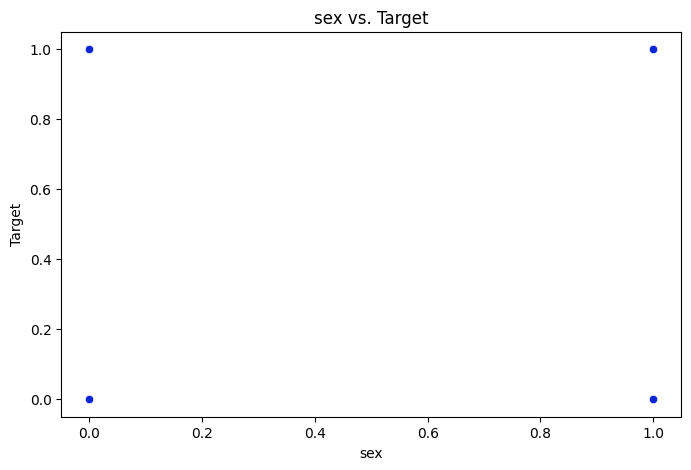

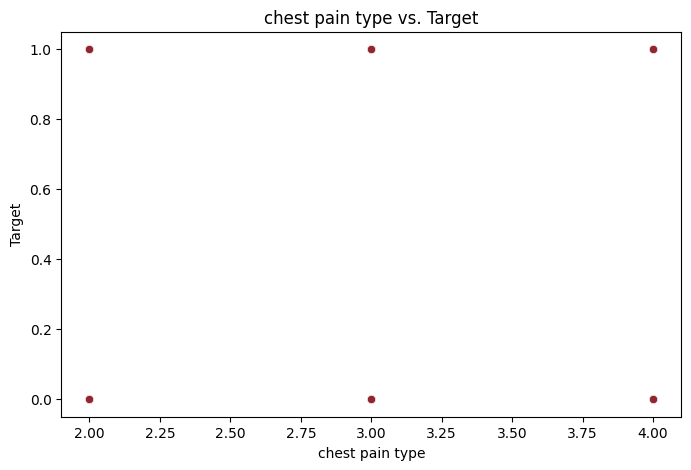

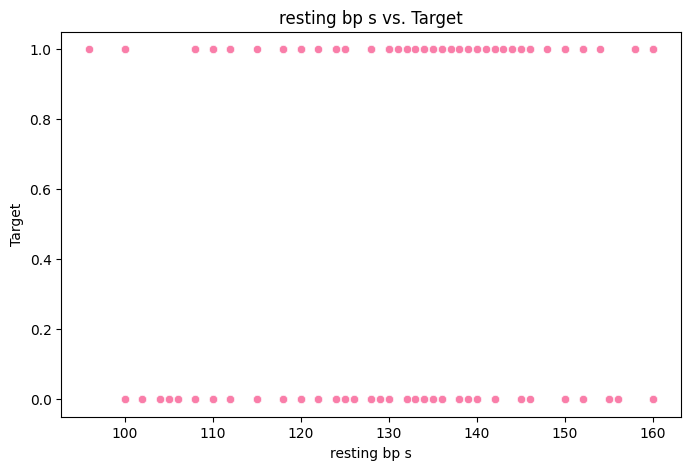

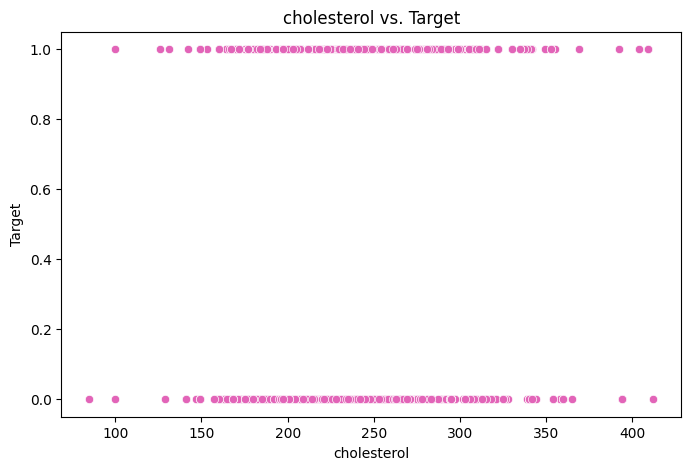

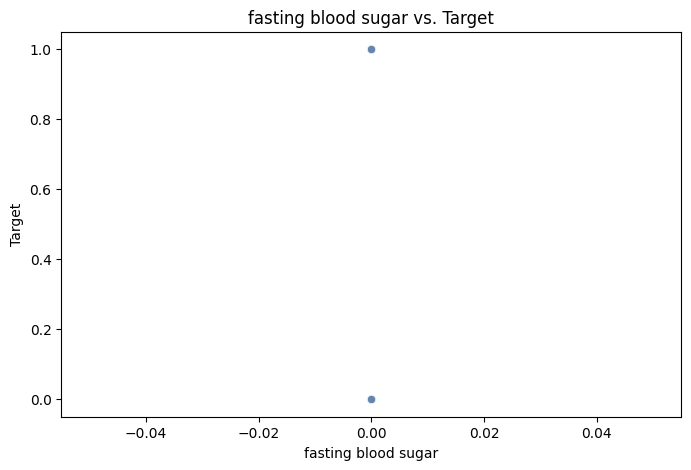

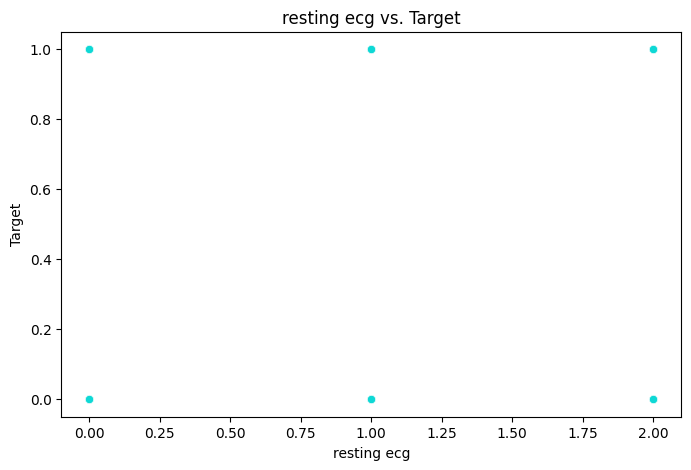

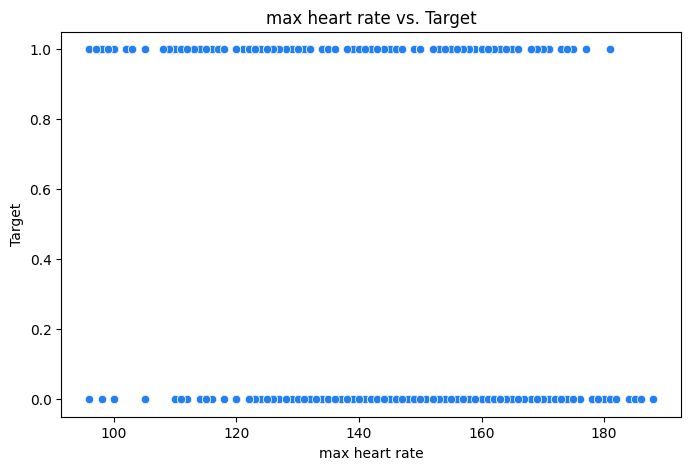

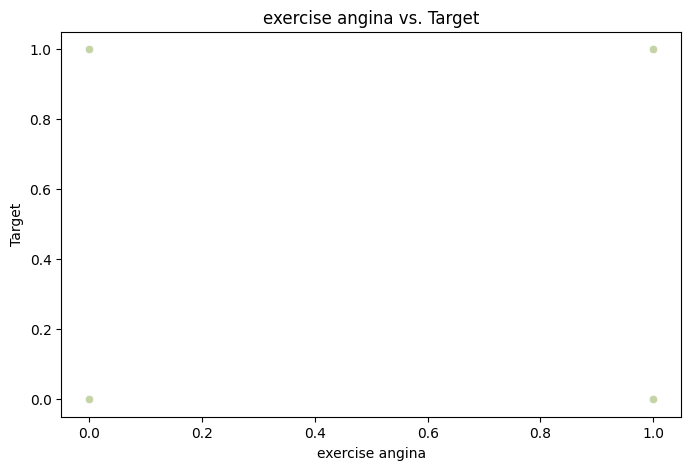

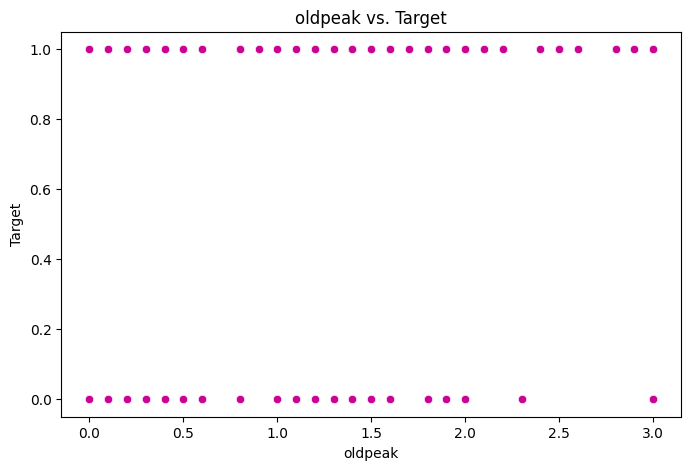

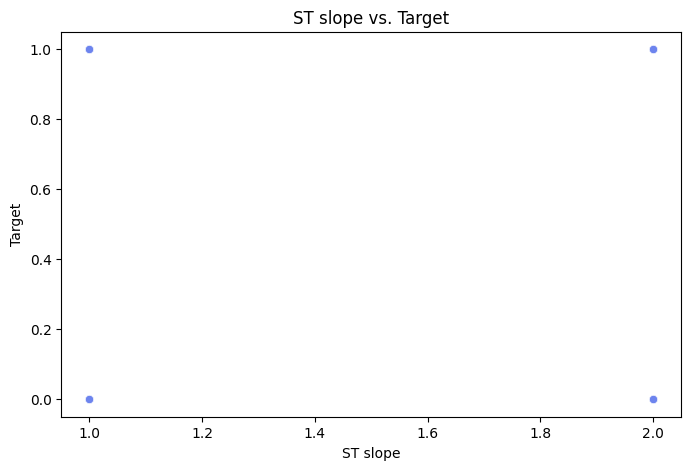

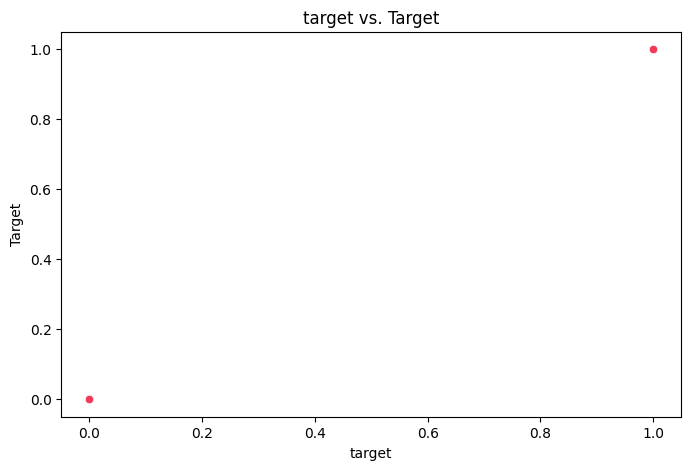

In [14]:
# Target vs X graphs
for column in df.columns:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=column, y="target", data=df, color=np.random.rand(3,))
    plt.xlabel(column)
    plt.ylabel("Target")
    plt.title(f"{column} vs. Target")

Text(0.5, 1.0, 'Correlation Matrix For Columns')

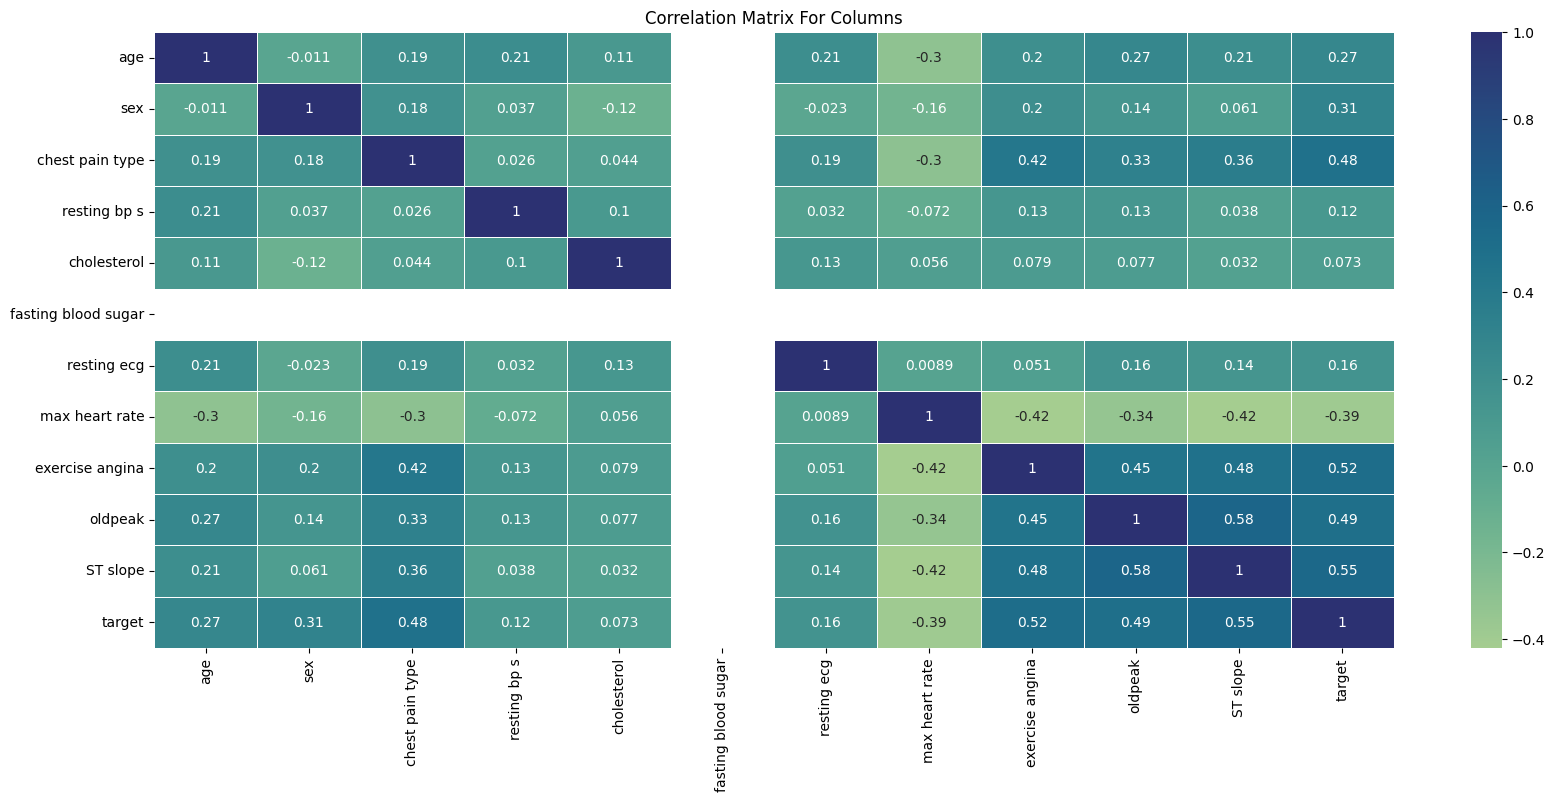

In [15]:
corr_matrix = df[df.columns].corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, cmap="crest", annot=True,linewidth=.5);
plt.title("Correlation Matrix For Columns")

In [16]:
df

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1182,41,1,2,120,157,0,0,182,0,0.0,1,0
1184,57,0,4,140,241,0,0,123,1,0.2,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


## Model


* Target estimation
* Models: Lasso, LinearRegression, Ridge, ElasticNet, KNeighborsRegressor, RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
* Find best model with MAE, MSE, RMSE R2 and Cross Validation metrics

In [17]:
models = {
    "Lasso": {
        "model": Lasso()
    },
    "LinearRegression": {
        "model": LinearRegression()
    },
    "Ridge": {
        "model": Ridge()
    },
    "ElasticNet": {
        "model": ElasticNet()
    },
    "KNeighborsRegressor": {
        "model": KNeighborsRegressor()
    },
    "RandomForestRegressor": {
        "model": RandomForestRegressor()
    },
    "GradientBoostingRegressor": {
        "model": GradientBoostingRegressor()
    },
    "AdaBoostRegressor": {
        "model": AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss="exponential", random_state=2)
    }
}

In [18]:
x = df.drop("target", axis=1)
y = df["target"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [19]:
def model_train():    
    for name, params in models.items():
        model = params["model"]
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        cros = cross_validate(model,x_test,y_test)
        
        print(f"""-----------{name}--------------
    MAE: {mae}
    MSE: {mse}
    RMSE: {rmse}
    R2 Score: {r2}
    Cross Validation: {cros["score_time"].mean()}
    ------------------------------""")

model_train()

-----------Lasso--------------
    MAE: 0.4138375432709242
    MSE: 0.19888937539335183
    RMSE: 0.4459701507874174
    R2 Score: 0.17807649607295173
    Cross Validation: 0.0010239601135253907
    ------------------------------
-----------LinearRegression--------------
    MAE: 0.26447079661824374
    MSE: 0.12029942827774397
    RMSE: 0.34684207973909964
    R2 Score: 0.5028546526685453
    Cross Validation: 0.0014120101928710937
    ------------------------------
-----------Ridge--------------
    MAE: 0.26452910489753306
    MSE: 0.12020368314463807
    RMSE: 0.3467040281632708
    R2 Score: 0.5032503257663704
    Cross Validation: 0.0014632225036621093
    ------------------------------
-----------ElasticNet--------------
    MAE: 0.3999911024816172
    MSE: 0.1953975326453612
    RMSE: 0.44203793122916635
    R2 Score: 0.1925067672773062
    Cross Validation: 0.0017168998718261718
    ------------------------------
-----------KNeighborsRegressor--------------
    MAE: 0.34328358

In [20]:
from scipy.stats import uniform as sp_randFloat
from scipy.stats import randint as sp_randInt
from sklearn.model_selection import RandomizedSearchCV

In [21]:
parameters = {'learning_rate': sp_randFloat(),
                  'subsample'    : sp_randFloat(),
                  'n_estimators' : sp_randInt(100, 1000),
                  'max_depth'    : sp_randInt(4, 10)
                 }

In [22]:
def last_model_train(): 
        model = GradientBoostingRegressor() # Best model from model set
        randm_src = RandomizedSearchCV(estimator=model, param_distributions = parameters,
                               n_iter = 10, n_jobs=-1) 
        model.fit(x_train, y_train)
        predictions = model.predict(x_test)

        mae = mean_absolute_error(y_test, predictions)
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, predictions)
        cros = cross_validate(model,x_test,y_test)
        
        print(f"""-----------{"GradientBoostingRegressor"}--------------
    MAE: {mae}
    MSE: {mse}
    RMSE: {rmse}
    R2 Score: {r2}
    Cross Validation: {cros["score_time"].mean()},
    ------------------------------""")
last_model_train()

-----------GradientBoostingRegressor--------------
    MAE: 0.20256988381291324
    MSE: 0.07953026609814116
    RMSE: 0.2820111098842405
    R2 Score: 0.6713359129900525
    Cross Validation: 0.0023252010345458985,
    ------------------------------
